In [1]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dirrie1 = '../in/'
dirrie2 = '../out/'
os.listdir(dirrie1)

['STRK-Mingti-Ext.json',
 'STRK-Mingti.json',
 'STRK-Heiti.json',
 'DFLIHL1B.json',
 'STRK-Kaiti.json',
 'note.txt']

In [3]:
fnt = 'STRK-Heiti.json'
fntn = 'hei'

In [4]:
f = open(dirrie1+fnt)
data = json.load(f)
f.close()

In [5]:
txts = [
#     '篇哲学对话',
#     '二零二三年',
    '圈出版社',
#     '阿强',
#     '世界是什么',
#     '保华',
#     '世界是我们所生活的地方',
#     '阿强',
#     '那么人是什么',
#     '保华',
#     '人是世界的一部分是有意识的生命体',
#     '阿强',
#     '人为什么存在',
#     '保华',
#     '这是一个深奥的问题有许多不同的看法',
#     '有些人认为人存在是为了完成某种目的',
#     '有些人认为人存在是因为这是宇宙的规律',
]

In [10]:
'社'.encode("unicode_escape")

b'\\u793e'

0


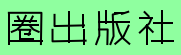

In [6]:
for t in range(len(txts)):
    #t = 8
    print(t)
    txt = txts[t]
    #txt='我很高兴'
    #
    txte = txt.encode("unicode_escape")
    txte = str(txte)
    txte = txte.replace("'","")
    txte = txte.replace("b'","")
    crs = txte.split('\\\\')
    crs = [c for c in crs if 'u' in c]
    crs = [c.upper() for c in crs]
    crs = [c.replace('U','U+') for c in crs]
    chars = crs
    #
    sca = 0.75
    fig, axs = plt.subplots(1, len(chars), figsize=((len(chars)*sca), sca))
    for c in range(len(chars)):
        #c = 5
        un = c
        u = chars[c]
        for s in range(len(data[u])):
            xx = []
            yy = []
            for p in range(len(data[u][s])):
                xx.append(data[u][s][p][0])
                yy.append(data[u][s][p][1])
            axs[c].plot(xx, yy, c='k', lw=2)
            axs[c].axis("off")
        fntc = ['STRK-Heiti.json', 'STRK-Mingti.json']
        if (fnt in fntc and u == 'U+4E00'): # correction for '一' height
            ymi = 1.5
            yma = 0.3
        else:
            ymi = 1.1
            yma = -0.1    
        axs[c].set_ylim(ymi, yma)
    fig.patch.set_facecolor('xkcd:mint green')
    plt.savefig(dirrie2+"multi3_"+str(t)+".svg")
    plt.show()